In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
loans = pd.read_csv('kiva_loans.csv')
theme_ids = pd.read_csv('loan_theme_ids.csv')
theme_reg = pd.read_csv('loan_themes_by_region.csv')
mpi_national  = pd.read_csv('MPI_national.csv')
mpi_subnational = pd.read_csv('MPI_national.csv')
k_mpi_reg_loc  = pd.read_csv('kiva_mpi_region_locations.csv')
Loans = pd.read_csv('loans.csv')
lenders = pd.read_csv('lenders.csv')
loans_lenders = pd.read_csv('loans_lenders.csv')

In [3]:
loans.head(3)

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01


In [4]:
theme_ids.head(2)

,id,Loan Theme ID,Loan Theme Type,Partner ID
0,638631,a1050000000skGl,General,151.0
1,640322,a1050000000skGl,General,151.0


In [5]:
theme_reg.head(2)

,Partner ID,Field Partner Name,sector,Loan Theme ID,Loan Theme Type,country,forkiva,region,geocode_old,ISO,...,amount,LocationName,geocode,names,geo,lat,lon,mpi_region,mpi_geo,rural_pct
0,9,KREDIT Microfinance Institution,General Financial Inclusion,a1050000000slfi,Higher Education,Cambodia,No,Banteay Meanchey,"(13.75, 103.0)",KHM,...,450,"Banteay Meanchey, Cambodia","[(13.6672596, 102.8975098)]",Banteay Meanchey Province; Cambodia,"(13.6672596, 102.8975098)",13.667260,102.897510,"Banteay Mean Chey, Cambodia","(13.6672596, 102.8975098)",90.0
1,9,KREDIT Microfinance Institution,General Financial Inclusion,a10500000068jPe,Vulnerable Populations,Cambodia,No,Battambang Province,NaN,KHM,...,20275,"Battambang Province, Cambodia","[(13.0286971, 102.989615)]",Battambang Province; Cambodia,"(13.0286971, 102.989615)",13.028697,102.989615,"Banteay Mean Chey, Cambodia","(13.6672596, 102.8975098)",90.0


In [82]:
theme_reg.columns

Index(['Partner ID', 'Field Partner Name', 'sector', 'Loan Theme ID',
       'Loan Theme Type', 'country', 'forkiva', 'region', 'geocode_old', 'ISO',
       'number', 'amount', 'LocationName', 'geocode', 'names', 'geo', 'lat',
       'lon', 'mpi_region', 'mpi_geo', 'rural_pct'],
      dtype='object')

In [138]:
theme_reg['sector'].value_counts()

General Financial Inclusion    13679
Clean Energy                     840
Other                            338
Agriculture                      300
Mobile Money and ICT             210
Education                        143
Water and Sanitation              92
Artisan                           55
DSE Direct                        45
SME Financial Inclusion           32
Health                             2
Name: sector, dtype: int64

In [104]:
theme_reg['Loan Theme Type'].value_counts()

General                                                5661
Agriculture                                             919
Underserved                                             696
Higher Education                                        649
Startup                                                 485
Green                                                   437
Water and Sanitation                                    390
Clean Cookstove                                         341
First/Second Chance                                     323
Agriculture (Women)                                     310
Vulnerable Populations                                  303
Rural Inclusion                                         302
Youth                                                   281
Organic Agriculture                                     242
Education                                               210
SME                                                     200
General (Women)                         

In [120]:
theme_reg['country'].value_counts()

Philippines                         3467
Armenia                             1064
Colombia                             824
Mexico                               716
Vietnam                              687
Peru                                 609
Kenya                                593
Cambodia                             567
El Salvador                          496
Tajikistan                           454
Lebanon                              416
Kyrgyzstan                           412
Samoa                                398
Lesotho                              336
Uganda                               304
India                                296
Georgia                              296
Palestine                            285
Mali                                 235
Pakistan                             227
Ghana                                210
Indonesia                            196
Guatemala                            186
Ecuador                              173
Honduras        

In [81]:
Loans.head(5)

,loan_id,loan_name,original_language,description,description_translated,funded_amount,loan_amount,status,activity_name,sector_name,...,raised_time,lender_term,num_lenders_total,num_journal_entries,num_bulk_entries,tags,borrower_genders,borrower_pictured,repayment_interval,distribution_model
0,657307,Aivy,English,"Aivy, 21 years of age, is single and lives in ...",NaN,125.0,125.0,funded,General Store,Retail,...,2014-01-15 04:48:22.000 +0000,7.0,3,2,1,NaN,female,true,irregular,field_partner
1,657259,Idalia Marizza,Spanish,"Doña Idalia, esta casada, tiene 57 años de eda...","Idalia, 57, is married and lives with her husb...",400.0,400.0,funded,Used Clothing,Clothing,...,2014-02-25 06:42:06.000 +0000,8.0,11,2,1,NaN,female,true,monthly,field_partner
2,658010,Aasia,English,Aasia is a 45-year-old married lady and she ha...,NaN,400.0,400.0,funded,General Store,Retail,...,2014-01-24 23:06:18.000 +0000,14.0,16,2,1,"#Woman Owned Biz, #Supporting Family, user_fav...",female,true,monthly,field_partner
3,659347,Gulmira,Russian,"Гулмире 36 лет, замужем, вместе с супругом вос...",Gulmira is 36 years old and married. She and ...,625.0,625.0,funded,Farming,Agriculture,...,2014-01-22 05:29:28.000 +0000,14.0,21,2,1,user_favorite,female,true,monthly,field_partner
4,656933,Ricky\t,English,Ricky is a farmer who currently cultivates his...,NaN,425.0,425.0,funded,Farming,Agriculture,...,2014-01-14 17:29:27.000 +0000,7.0,15,2,1,"#Animals, #Eco-friendly, #Sustainable Ag",male,true,bullet,field_partner


In [9]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671205 entries, 0 to 671204
Data columns (total 20 columns):
id                    671205 non-null int64
funded_amount         671205 non-null float64
loan_amount           671205 non-null float64
activity              671205 non-null object
sector                671205 non-null object
use                   666973 non-null object
country_code          671197 non-null object
country               671205 non-null object
region                614405 non-null object
currency              671205 non-null object
partner_id            657698 non-null float64
posted_time           671205 non-null object
disbursed_time        668809 non-null object
funded_time           622874 non-null object
term_in_months        671205 non-null float64
lender_count          671205 non-null int64
tags                  499789 non-null object
borrower_genders      666984 non-null object
repayment_interval    671205 non-null object
date                  671205 non

In [10]:
loans.describe()

,id,funded_amount,loan_amount,partner_id,term_in_months,lender_count
count,6.712050e+05,671205.000000,671205.000000,657698.000000,671205.000000,671205.000000
mean,9.932486e+05,785.995061,842.397107,178.199616,13.739022,20.590922
std,1.966113e+05,1130.398941,1198.660073,94.247581,8.598919,28.459551
min,6.530470e+05,0.000000,25.000000,9.000000,1.000000,0.000000
25%,8.230720e+05,250.000000,275.000000,126.000000,8.000000,7.000000
50%,9.927800e+05,450.000000,500.000000,145.000000,13.000000,13.000000
75%,1.163653e+06,900.000000,1000.000000,204.000000,14.000000,24.000000
max,1.340339e+06,100000.000000,100000.000000,536.000000,158.000000,2986.000000


In [11]:
loans.describe(include = 'all')

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
count,6.712050e+05,671205.000000,671205.000000,671205,671205,666973,671197,671205,614405,671205,657698.000000,671205,668809,622874,671205.000000,671205.000000,499789,666984,671205,671205
unique,NaN,NaN,NaN,163,15,424912,86,87,12695,67,NaN,667399,5719,498007,NaN,NaN,86719,11298,4,1298
top,NaN,NaN,NaN,Farming,Agriculture,to buy a water filter to provide safe drinking...,PH,Philippines,Kaduna,PHP,NaN,2017-05-15 00:00:00+00:00,2017-02-01 08:00:00+00:00,2016-09-21 13:03:24+00:00,NaN,NaN,user_favorite,female,monthly,2017-03-20
freq,NaN,NaN,NaN,72955,180302,5217,160441,160441,10000,160440,NaN,25,2800,33,NaN,NaN,27088,426502,342717,1308
mean,9.932486e+05,785.995061,842.397107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,178.199616,NaN,NaN,NaN,13.739022,20.590922,NaN,NaN,NaN,NaN
std,1.966113e+05,1130.398941,1198.660073,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.247581,NaN,NaN,NaN,8.598919,28.459551,NaN,NaN,NaN,NaN
min,6.530470e+05,0.000000,25.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.000000,NaN,NaN,NaN,1.000000,0.000000,NaN,NaN,NaN,NaN
25%,8.230720e+05,250.000000,275.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,126.000000,NaN,NaN,NaN,8.000000,7.000000,NaN,NaN,NaN,NaN
50%,9.927800e+05,450.000000,500.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,145.000000,NaN,NaN,NaN,13.000000,13.000000,NaN,NaN,NaN,NaN
75%,1.163653e+06,900.000000,1000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,204.000000,NaN,NaN,NaN,14.000000,24.000000,NaN,NaN,NaN,NaN


In [14]:
loans.isnull().sum()

id                         0
funded_amount              0
loan_amount                0
activity                   0
sector                     0
use                     4232
country_code               8
country                    0
region                 56800
currency                   0
partner_id             13507
posted_time                0
disbursed_time          2396
funded_time            48331
term_in_months             0
lender_count               0
tags                  171416
borrower_genders        4221
repayment_interval         0
date                       0
dtype: int64

In [87]:
round(5.5)

6

# Functions

In [136]:
(pd.crosstab(loans[0:10001].country, loans[:10001].repayment_interval, margins = True, margins_name = "Aggregate"))

repayment_interval,bullet,irregular,monthly,weekly,Aggregate
country,,,,,
Albania,1,0,46,0,47
Armenia,0,0,109,0,109
Azerbaijan,0,0,45,0,45
Bolivia,0,18,139,0,157
Brazil,0,0,1,0,1
Burkina Faso,0,14,3,0,17
Burundi,0,30,14,0,44
Cambodia,1,3,351,0,355
Cameroon,0,4,42,0,46


In [100]:
def loan_percent():
    c = loans['country'].value_counts().index
    ctry_l_percent = {}
    for con in c:
        calc = loans[loans['country'] == con]['loan_amount'].sum()/loans['loan_amount'].sum()
        ctry_l_percent[con] = round(calc*100,2)
    return ctry_l_percent

In [101]:
lp = loan_percent()

In [102]:
#Laon percentage of each contries
lp

{'Philippines': 9.79,
 'Kenya': 6.11,
 'El Salvador': 4.71,
 'Cambodia': 3.51,
 'Pakistan': 2.35,
 'Peru': 5.46,
 'Colombia': 2.55,
 'Uganda': 2.72,
 'Tajikistan': 2.66,
 'Ecuador': 2.65,
 'Paraguay': 5.24,
 'Nicaragua': 1.88,
 'India': 1.19,
 'Vietnam': 2.63,
 'Nigeria': 0.39,
 'Bolivia': 3.51,
 'Lebanon': 2.15,
 'Armenia': 2.28,
 'Palestine': 2.31,
 'Samoa': 1.11,
 'Guatemala': 2.02,
 'Rwanda': 2.94,
 'Mali': 1.59,
 'Honduras': 1.07,
 'Indonesia': 0.86,
 'United States': 5.57,
 'Kyrgyzstan': 1.26,
 'Togo': 0.27,
 'Mexico': 1.72,
 'Sierra Leone': 0.74,
 'Tanzania': 1.21,
 'Ghana': 0.88,
 'Jordan': 0.83,
 'Zimbabwe': 0.61,
 'Madagascar': 0.22,
 'Liberia': 0.21,
 'Haiti': 0.49,
 'Mozambique': 0.37,
 'Senegal': 1.24,
 'The Democratic Republic of the Congo': 1.99,
 'Timor-Leste': 0.43,
 'Burkina Faso': 0.53,
 'Georgia': 0.64,
 'Yemen': 0.33,
 'Cameroon': 0.17,
 'Azerbaijan': 0.51,
 'Albania': 0.47,
 'Myanmar (Burma)': 0.57,
 'Turkey': 0.13,
 'Egypt': 0.2,
 'Costa Rica': 0.38,
 "Lao People

In [29]:
def countries_fund():
    c = loans['country'].value_counts().index
    ctry_fund = {}
    for ctry in c:
        cal = loans[loans['country'] == ctry]['funded_amount'].mean()
        ctry_fund[ctry] = cal
    return ctry_fund

In [30]:
def activities_fund():
    a = loans['activity'].value_counts().index
    act_fund = {}
    for act in a:
        cal1 = loans[loans['activity'] == act]['funded_amount'].mean()
        act_fund[act] = cal1
    return act_fund

In [31]:
def sectors_fund():
    s = loans['sector'].value_counts().index
    sec_fund = {}
    for sec in s:
        cal2 = loans[loans['sector'] == sec]['funded_amount'].mean()
        sec_fund[sec] = cal2
    return sec_fund

In [32]:
cf = countries_fund()
af = activities_fund()
sf = sectors_fund()

In [33]:
items1 = [(v,k) for k, v in cf.items()]
items1.sort()
items2 = [(v,k) for k, v in af.items()]
items2.sort()
items3 = [(v,k) for k, v in sf.items()]
items3.sort()

In [34]:
#top 10 countries on funded amount(mean)
items1[::-1][:10]

[(50000.0, "Cote D'Ivoire"),
 (15000.0, 'Mauritania'),
 (7812.5, 'Bhutan'),
 (7625.0, 'Chile'),
 (7000.0, 'Afghanistan'),
 (6142.578125, 'Congo'),
 (4409.191176470588, 'Puerto Rico'),
 (4200.604838709677, 'Dominican Republic'),
 (4046.875, 'Namibia'),
 (3800.8435910060725, 'United States')]

In [35]:
#Top 10 activities on funded amount(mean)
items2[::-1][:10]

[(3640.1470588235293, 'Landscaping / Gardening'),
 (3074.6581196581196, 'Renewable Energy Products'),
 (2405.870786516854, 'Technology'),
 (2325.8854166666665, 'Communications'),
 (2280.3278688524592, 'Child Care'),
 (2228.1724137931033, 'Cleaning Services'),
 (2092.3076923076924, 'Film'),
 (1851.595744680851, 'Used Shoes'),
 (1829.6153846153845, 'Florist'),
 (1700.3810975609756, 'Perfumes')]

In [36]:
#Top 10 Funded sectors
items3[::-1][:10]

[(1449.3690851735016, 'Wholesale'),
 (1232.644578313253, 'Entertainment'),
 (1063.0160039093519, 'Clothing'),
 (1008.5378111040204, 'Construction'),
 (994.4974520221186, 'Health'),
 (980.1869817578773, 'Arts'),
 (968.7847031889853, 'Education'),
 (951.840607000443, 'Services'),
 (862.8624355670103, 'Manufacturing'),
 (842.1757392596062, 'Food')]

In [37]:
loans.head(3)

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01


In [ ]:
tnpolice.eservice.gov.in

# Philippines

In [38]:
phil = loans[loans['country'] == 'Philippines']

In [39]:
phil.index = range(0, len(phil))

In [40]:
phil

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653092,175.0,175.0,Pigs,Agriculture,to buy piglets and feed,PH,Philippines,Liloy-Dela Paz,PHP,126.0,2014-01-02 00:25:40+00:00,2013-12-12 08:00:00+00:00,2014-01-02 01:42:51+00:00,8.0,6,NaN,female,irregular,2014-01-02
1,653149,175.0,175.0,Pigs,Agriculture,to purchase feed and vitamins for her pigs,PH,Philippines,"Tanjay, Negros Oriental",PHP,145.0,2014-01-02 04:18:30+00:00,2013-12-06 08:00:00+00:00,2014-01-02 07:47:28+00:00,8.0,7,NaN,female,irregular,2014-01-02
2,653123,700.0,700.0,General Store,Retail,"to buy additional items like eggs, charcoal, r...",PH,Philippines,"Brookes Point, Palawan",PHP,145.0,2014-01-02 02:18:02+00:00,2013-12-10 08:00:00+00:00,2014-01-02 03:26:10+00:00,5.0,2,NaN,female,irregular,2014-01-02
3,653338,575.0,575.0,Farming,Agriculture,to purchase fertilizers and other farm supplies,PH,Philippines,"Tanjay, Negros Oriental",PHP,145.0,2014-01-02 13:38:42+00:00,2013-12-05 08:00:00+00:00,2014-01-02 23:01:23+00:00,8.0,19,NaN,female,irregular,2014-01-02
4,653242,325.0,325.0,General Store,Retail,"to purchase sugar, coffee, coffee creamer, can...",PH,Philippines,"Sinippil, Cauayan City, Isabela",PHP,123.0,2014-01-02 09:13:05+00:00,2013-12-13 08:00:00+00:00,2014-01-02 17:50:06+00:00,7.0,11,volunteer_pick,female,irregular,2014-01-02
5,653108,125.0,125.0,General Store,Retail,to buy goods to sell.,PH,Philippines,Pagadian - Lower Bagong Silang Pagadian City,PHP,126.0,2014-01-02 01:01:40+00:00,2013-12-16 08:00:00+00:00,2014-01-02 03:07:34+00:00,8.0,5,"#Woman Owned Biz, #Parent, #Interesting Photo",female,irregular,2014-01-02
6,653134,575.0,575.0,Pigs,Agriculture,to purchase additional feed for her pigs.,PH,Philippines,"Brookes Point, Palawan",PHP,145.0,2014-01-02 02:58:01+00:00,2013-12-09 08:00:00+00:00,2014-01-02 14:47:08+00:00,8.0,20,NaN,female,irregular,2014-01-02
7,653115,275.0,275.0,Pigs,Agriculture,to buy piglets to raise,PH,Philippines,"Liloy-Timan, Liloy, Zamboanga del norte",PHP,126.0,2014-01-02 01:04:52+00:00,2013-12-12 08:00:00+00:00,2014-01-08 07:48:36+00:00,11.0,11,NaN,female,irregular,2014-01-02
8,653099,700.0,700.0,Poultry,Agriculture,to purchase 800 day-old layer chicks,PH,Philippines,"Tudela-Pan-ay ,Clarin,Misamis Occidental",PHP,126.0,2014-01-02 00:51:39+00:00,2013-12-19 08:00:00+00:00,2014-01-02 19:15:44+00:00,14.0,21,NaN,male,monthly,2014-01-02
9,653117,575.0,575.0,Farming,Agriculture,to purchase fertilizer and other farming supplies,PH,Philippines,"Liloy-San Miguel, Liloy, Zamboanga del Norte",PHP,126.0,2014-01-02 01:05:45+00:00,2013-12-17 08:00:00+00:00,2014-01-29 07:21:43+00:00,14.0,18,NaN,female,monthly,2014-01-02


In [70]:
phil['region'].value_counts()

Palo, Leyte                                           3320
Narra, Palawan                                        3197
Quezon, Palawan                                       3120
Tacloban City, Leyte                                  2843
Brookes Point, Palawan                                2793
Kabankalan, Negros Occidental                         2792
Bais, Negros Oriental                                 2665
Cordova, Cebu                                         2617
Roxas City, Capiz                                     2580
Banga, Aklan                                          2526
Dumaguete, Negros Oriental                            2467
Hinigaran, Negros Occidental                          2407
Isabela, Negros Occidental                            2371
Calbayog City, Samar                                  2197
Tanjay, Negros Oriental                               2092
Himamaylan, Negros Occidental                         2052
Calatrava, Negros Occidental                          20

In [57]:
#Amount in PHP

print(phil['loan_amount'].min())
print(phil['loan_amount'].max())
print(phil['loan_amount'].mean())
print(phil['loan_amount'].std())


25.0
25000.0
344.93817041778595
234.91784167592786


In [54]:
def regions_fund():
    r = phil['region'].value_counts().index
    reg_fund = {}
    for reg in r:
        cal4 = phil[phil['region'] == reg]['funded_amount'].sum()
        reg_fund[reg] = cal4
    return reg_fund

In [56]:
regs =regions_fund()

In [58]:
items4 = [(v,k) for k, v in regs.items()]
items4.sort()

In [63]:
#Top 10 regioms in philippines on funded amount(mean)
reg10 = items4[::-1][:10]


In [68]:
reg10

[(1234625.0, 'Narra, Palawan'),
 (1210875.0, 'Quezon, Palawan'),
 (1180100.0, 'Brookes Point, Palawan'),
 (1040700.0, 'Kabankalan, Negros Occidental'),
 (956950.0, 'Hinigaran, Negros Occidental'),
 (902675.0, 'Cordova, Cebu'),
 (886500.0, 'Isabela, Negros Occidental'),
 (829800.0, 'Bais, Negros Oriental'),
 (807850.0, 'Dumaguete, Negros Oriental'),
 (750525.0, 'Roxas City, Capiz')]

C:\Users\srt90\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


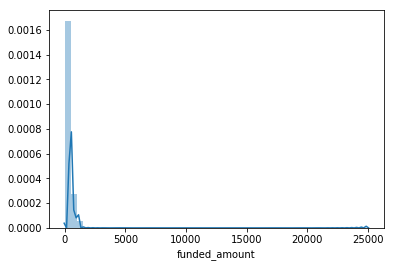

In [41]:
sns.distplot(phil['funded_amount'])

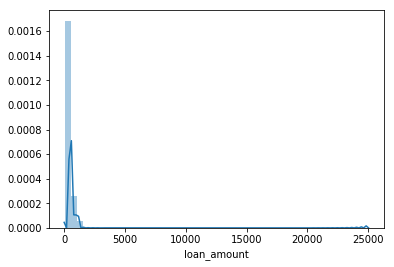

In [42]:
sns.distplot(phil['loan_amount'])

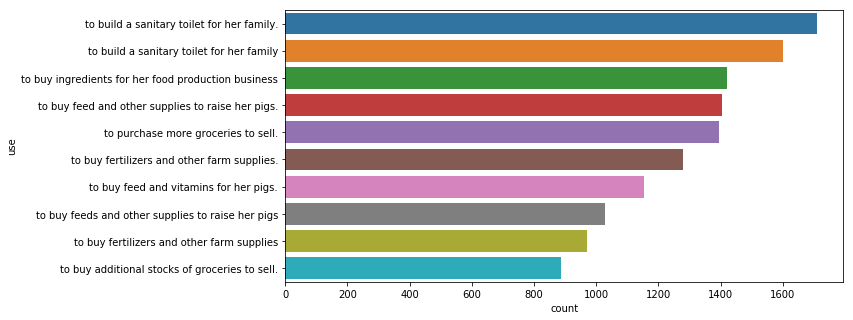

In [43]:
plt.figure(figsize=(10,5))
sns.countplot(y = 'use',order = phil['use'].value_counts().iloc[:10].index, data = phil)

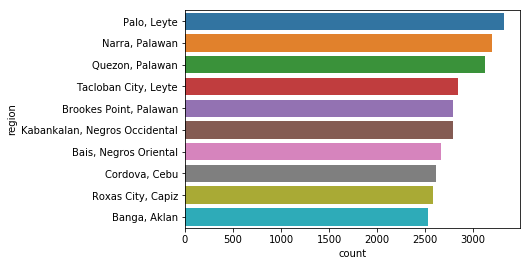

In [44]:
sns.countplot(y = 'region', order = phil['region'].value_counts().iloc[:10].index, data = phil)

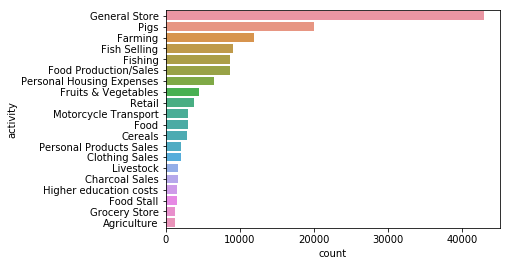

In [45]:
sns.countplot(y = 'activity', order = phil['activity'].value_counts().iloc[:20].index, data = phil)

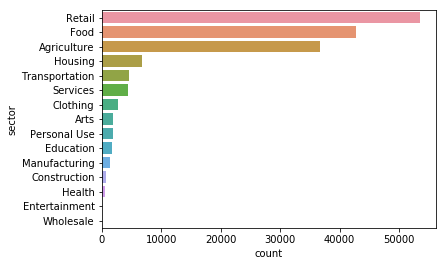

In [46]:
sns.countplot(y = 'sector', order = phil['sector'].value_counts().index, data = phil)

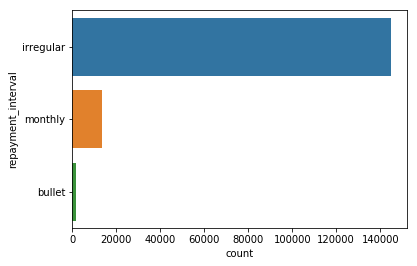

In [47]:
sns.countplot(y = 'repayment_interval', data = phil)

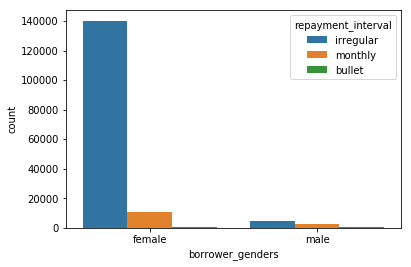

In [48]:
#Sex borrowers vs repayment interval
sns.countplot(x = 'borrower_genders',order = phil['borrower_genders'].value_counts().index,hue = 'repayment_interval', data = phil)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

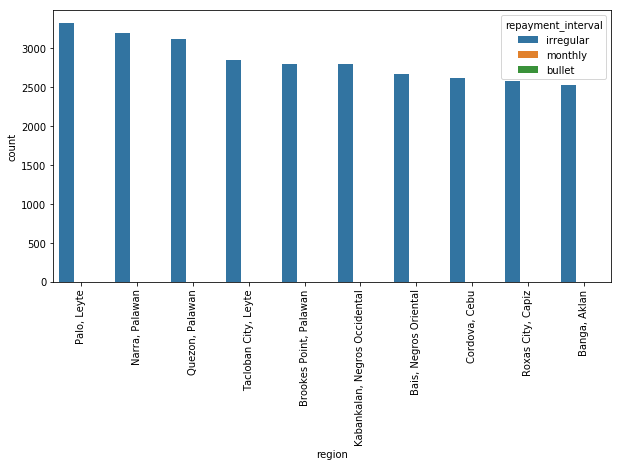

In [72]:
#Region vs repayment interval

plt.figure(figsize=(10,5))
sns.countplot(x = 'region',order = phil['region'].value_counts().iloc[:10].index,hue = 'repayment_interval', data = phil)
plt.xticks(rotation = 90)

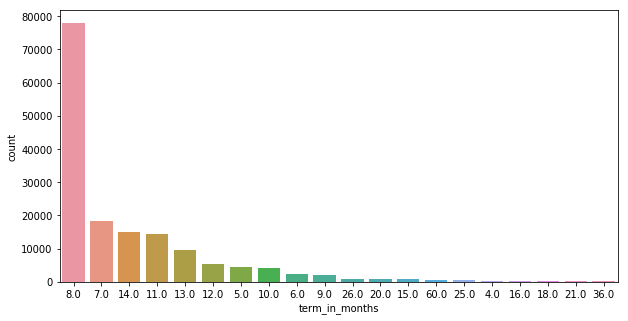

In [49]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'term_in_months',order = phil['term_in_months'].value_counts().iloc[:20].index, data = phil)

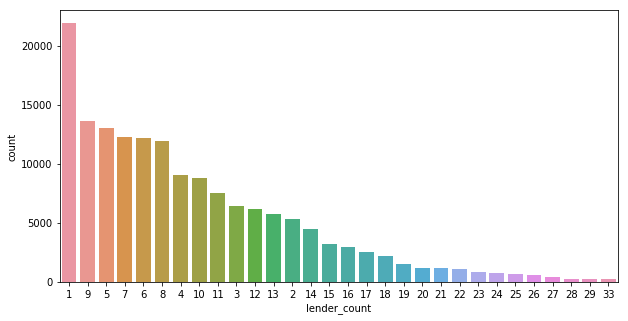

In [50]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'lender_count',order = phil['lender_count'].value_counts().iloc[:30].index, data = phil)

# Exploratory Data Analysis

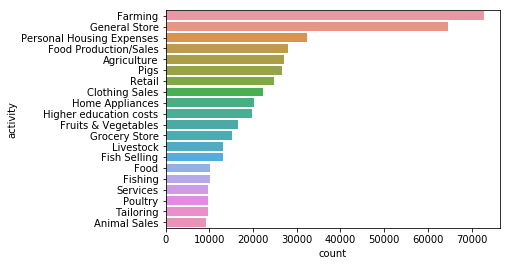

In [105]:
sns.countplot(y = 'activity', order = loans['activity'].value_counts().iloc[:20].index, data = loans)

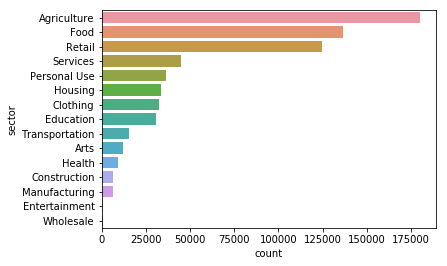

In [106]:
sns.countplot(y = 'sector', order = loans['sector'].value_counts().iloc[:20].index, data = loans)

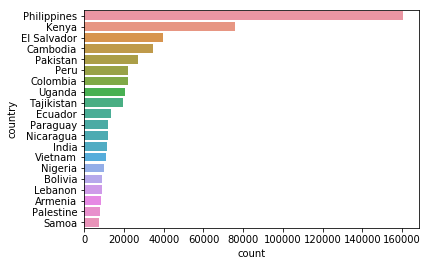

In [107]:
sns.countplot(y = 'country', order = loans['country'].value_counts().iloc[:20].index, data = loans)

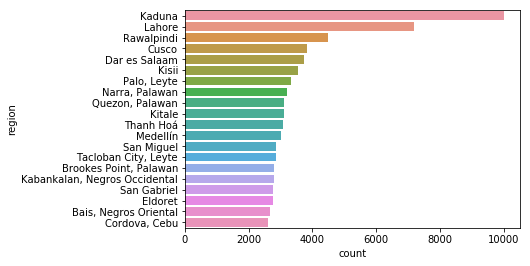

In [108]:
sns.countplot(y = 'region', order = loans['region'].value_counts().iloc[:20].index, data = loans)

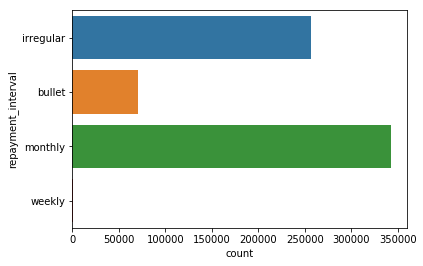

In [109]:
sns.countplot(y = 'repayment_interval', data = loans)

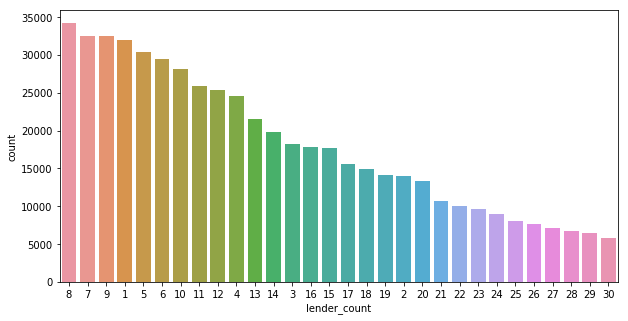

In [110]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'lender_count',order = loans['lender_count'].value_counts().iloc[:30].index, data = loans)

C:\Users\srt90\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


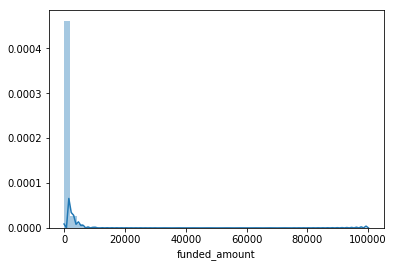

In [111]:
sns.distplot(loans['funded_amount'])

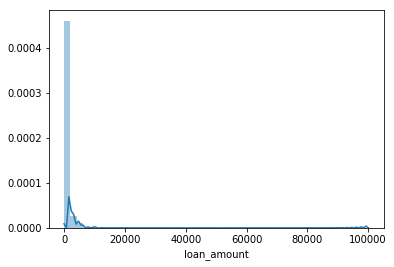

In [112]:
sns.distplot(loans['loan_amount'])

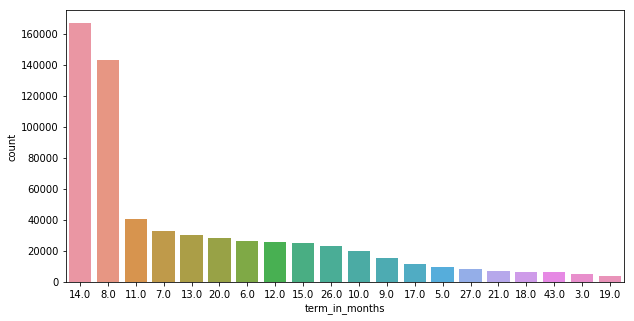

In [113]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'term_in_months',order = loans['term_in_months'].value_counts().iloc[:20].index, data = loans)

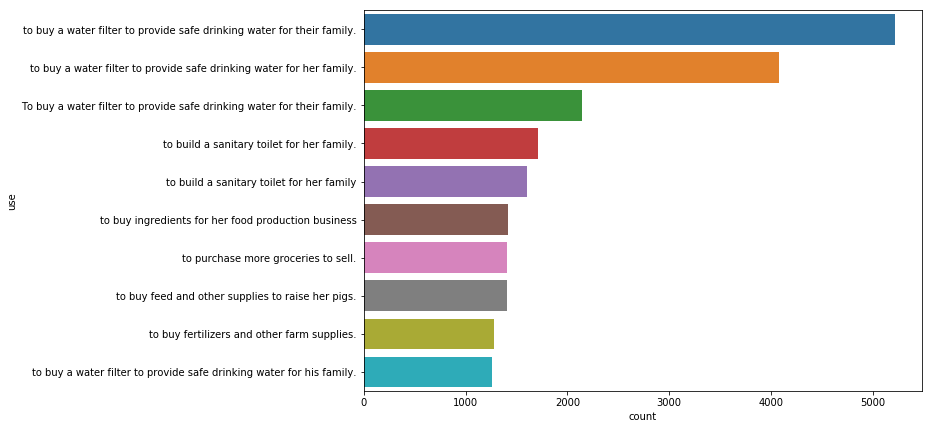

In [114]:
plt.figure(figsize=(10,7))
sns.countplot(y = 'use',order = loans['use'].value_counts().iloc[:10].index, data = loans)

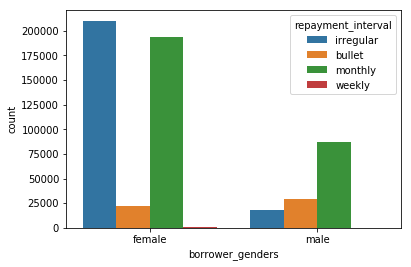

In [115]:
#Distribution of individual male and female borrowers
#Sex borrowers vs repayment interval
sns.countplot(x = 'borrower_genders',order = loans['borrower_genders'].value_counts().iloc[:2].index,hue = 'repayment_interval', data = loans)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

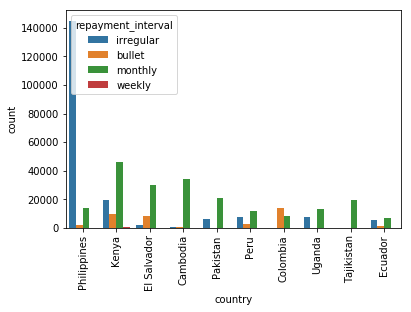

In [116]:
#country vs repayment interval
sns.countplot(x = 'country',order = loans['country'].value_counts().iloc[:10].index,hue = 'repayment_interval', data = loans)
plt.xticks(rotation = 90)

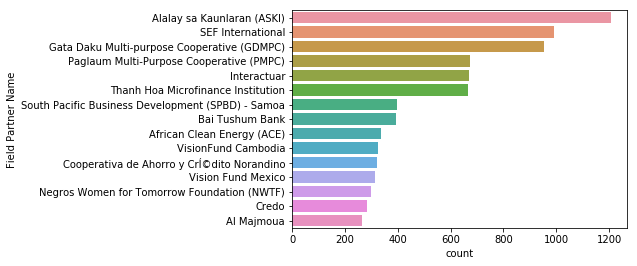

In [118]:
# Funding partners
sns.countplot(y = 'Field Partner Name', order = theme_reg['Field Partner Name'].value_counts().iloc[:15].index, data = theme_reg)

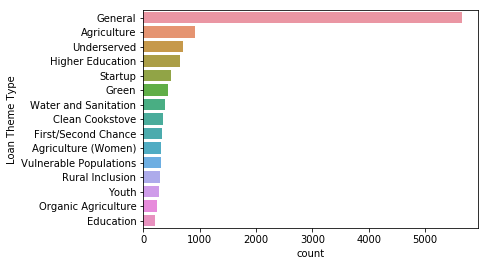

In [119]:
#Loan theme type
sns.countplot(y = 'Loan Theme Type', order = theme_reg['Loan Theme Type'].value_counts().iloc[:15].index, data = theme_reg)

In [ ]:
wn = loans['country'] == 'India' & loans['repayment_interval'] == 'monthly'

In [ ]:
one = loans['country'] == 'India'# and 

In [ ]:
two = loans['repayment_interval'] == 'monthly'

In [ ]:
three = one & two

In [ ]:
ase = loans[three]

In [ ]:
ase['repayment_interval'].value_counts()